<a href="https://colab.research.google.com/github/mahhhdy/thesis/blob/main/LSTM2_with_min_max_scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lstm network by minmax scaler</br>
this post has been used </br>
https://towardsdatascience.com/bitcoin-price-prediction-using-lstm-9eb0938c22bd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense , LSTM
from keras.layers import BatchNormalization
from sklearn.metrics import mean_squared_error
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
min_maxscaler = MinMaxScaler()

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BTCPrediction/BitcoinData.csv'

df = pd.read_csv(path)
np.random.seed(7)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df[::-1].reset_index(drop=True)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 04, 2011",0.3,0.3,0.3,0.3,1.88K,0.00%
1,"Jan 05, 2011",0.3,0.3,0.3,0.3,0.36K,0.00%
2,"Jan 06, 2011",0.3,0.3,0.3,0.3,3.46K,0.00%
3,"Jan 07, 2011",0.3,0.3,0.3,0.3,42.60K,0.00%
4,"Jan 08, 2011",0.3,0.3,0.3,0.3,1.63K,0.00%


In [ ]:
df.drop(['Date'], 1, inplace=True)
# df['Date'] = pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df['Change %'] = df['Change %'].str.slice(0, -1)
df['Vol.'] = df['Vol.'].str.slice(0, -1)

for x in ['Price','Open','High','Low']:
  if(df.dtypes[x]==np.object):
    df[x] = df[x].str.replace(',','')
    df[x] = df[x].astype(np.float64)

df['Vol.'] = pd.to_numeric(df['Vol.'], downcast="float")
df['Change %'] = pd.to_numeric(df['Change %'], downcast="float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
df.head() , df.shape

(   Price  Open  High  Low       Vol.  Change %
 0    0.3   0.3   0.3  0.3   1.880000       0.0
 1    0.3   0.3   0.3  0.3   0.360000       0.0
 2    0.3   0.3   0.3  0.3   3.460000       0.0
 3    0.3   0.3   0.3  0.3  42.599998       0.0
 4    0.3   0.3   0.3  0.3   1.630000       0.0, (3989, 6))

In [ ]:
# df = df.to_numpy()
# df

In [ ]:
prediction_days = round(df.shape[0] * 0.7)

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

# X_train.shape , y_train.shape , X_test.shape , y_test.shape
df_train.shape , df_test.shape 

((1197, 6), (2792, 6))

ask from alireza --
sotone aval ro ham baraye amozesh estefade konam ?

In [ ]:
training_set = df_train.values
training_set = min_maxscaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)]
y_train = training_set[:,0:1]

# x_train.shape , y_train.shape , x_test.shape , y_test.shape

In [ ]:
test_set = df_test.values
test_set = min_maxscaler.fit_transform(test_set)

x_test = test_set[0:len(test_set)]
y_test = test_set[:,0:1]

In [ ]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

((1197, 6, 1), (1197, 1), (2792, 6, 1), (2792, 1))

In [ ]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 50

# Initialize the RNN
model = Sequential()

model.add(BatchNormalization())

# Adding the input layer and the LSTM layer
model.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
# model.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)
model.fit(x_train, y_train, validation_data=(x_train,y_train) , batch_size = batch_size, epochs = num_epochs , verbose=1)

Epoch 1/50
240/240 [==============================] - 3s 8ms/step - loss: nan - val_loss: nan
Epoch 2/50
240/240 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 3/50
240/240 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 4/50
240/240 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 5/50
240/240 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 6/50
240/240 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 7/50
240/240 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 8/50
240/240 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 9/50
240/240 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 10/50
240/240 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 11/50
240/240 [==============================] - 1s 6

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 6, 1)             4         
 hNormalization)                                                 
                                                                 
 lstm_1 (LSTM)               (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 103
Non-trainable params: 2
_________________________________________________________________


In [ ]:
test_set = df_test
len(test_set)

# inputs = np.reshape(test_set, (len(test_set), 1))
# inputs = min_max_scaler.transform(inputs)

# inputs= test_set.reshape(test_set.shape[0],test_set.shape[1],1)


# inputs = test_set.reshape((len(test_set), 1, 1))

predicted_price = model.predict(x_test)

# I have to ask from Alireza
# predicted_price = min_maxscaler.inverse_transform(predicted_price)

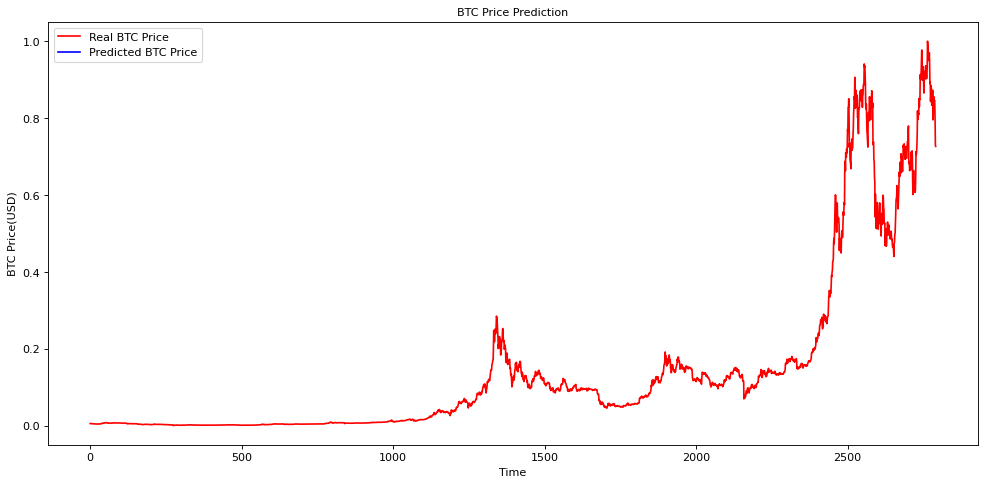

In [ ]:
plt.figure(figsize=(15, 7), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(x_test[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize = 10)
plt.legend(loc = 'best')
plt.show()